In [1]:
#importing necessary files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data
censunp = pd.read_csv('census_income.csv')
censunp.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
#checking the information of the dataset
censunp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#Shape of the dataset
censunp.shape

(32560, 15)

In [5]:
#checking for null values in the dataset
censunp.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
censunp.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [7]:
censunp = censunp.replace(' ?',np.NaN)

In [8]:
for i in ['Workclass', 'Occupation', 'Native_country']:
    censunp[i].fillna(censunp[i].mode()[0], inplace=True)

In [9]:
censunp

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
censunp.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

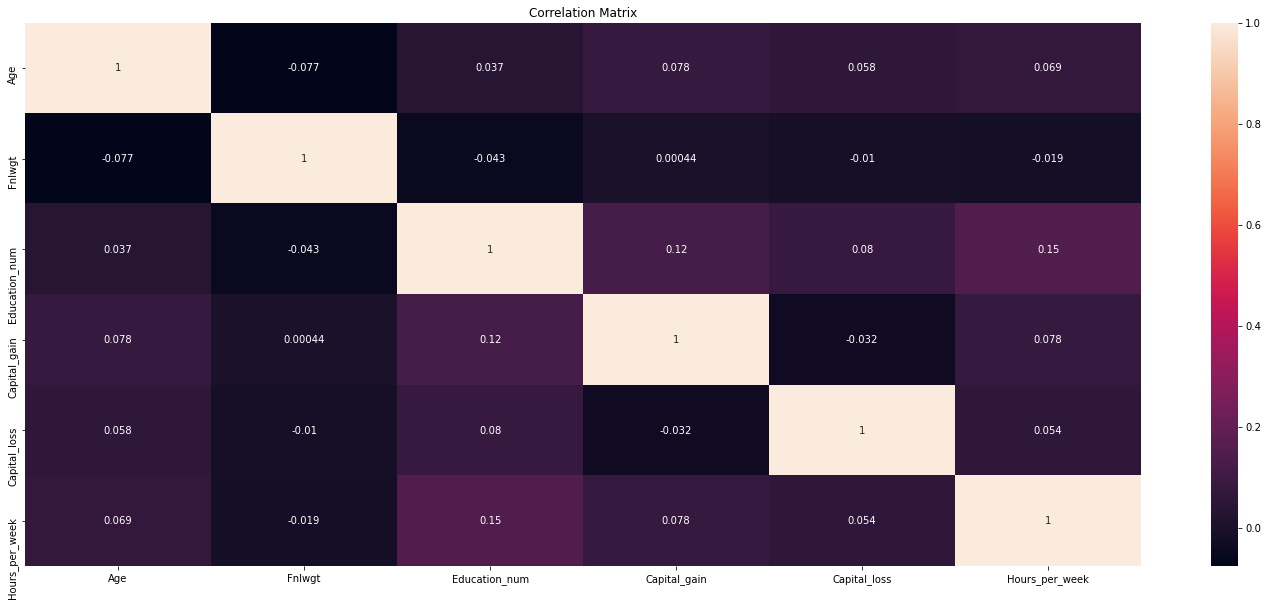

In [11]:
#chceking the relation between variables
corr = censunp.corr()
plt.figure(figsize = (25,10))
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [12]:
#LEts us check the 'income' values
censunp['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [13]:
censunp.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<AxesSubplot:xlabel='Income', ylabel='count'>

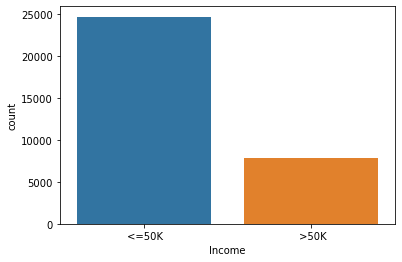

In [14]:
#visualizing the 'Income' column value counts
sns.countplot(x='Income',data=censunp)

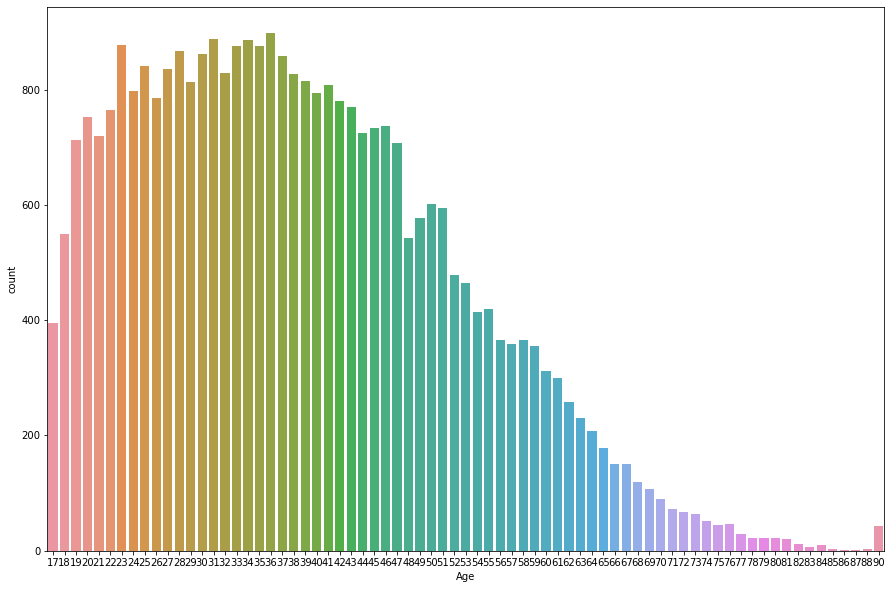

In [15]:
#Age
plt.figure(figsize=(15,10))
sns.countplot(x='Age',data=censunp)
plt.show()

<AxesSubplot:xlabel='Income', ylabel='Age'>

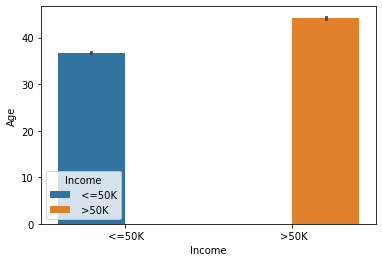

In [16]:
# Age Vs Income
sns.barplot(x='Income',y='Age',data=censunp,hue='Income')

In [17]:
#Occupation
censunp['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

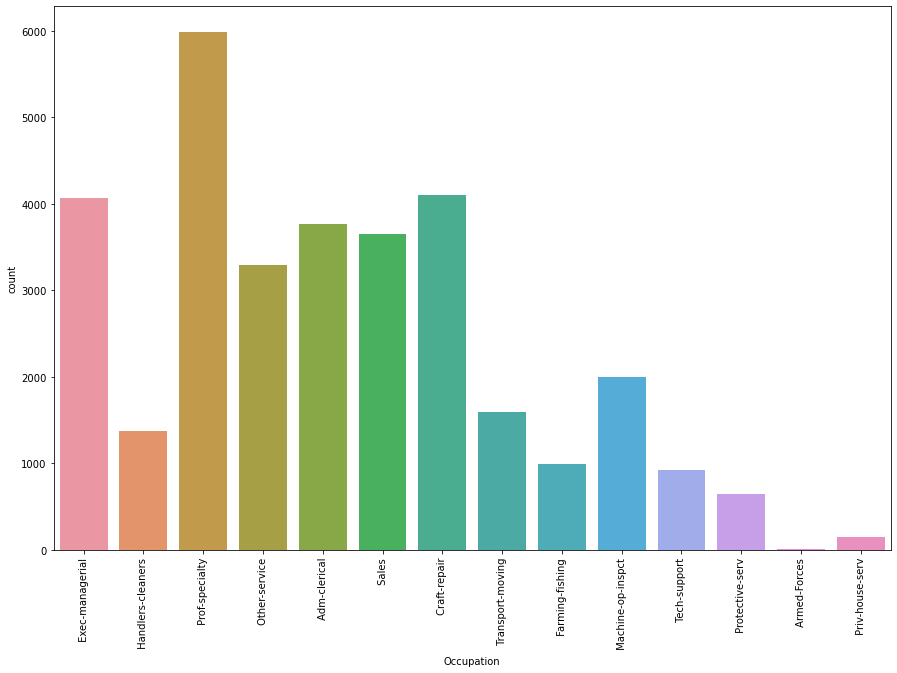

In [18]:
# Income Vs Occupation
plt.figure(figsize=(15,10))
sns.countplot(x='Occupation',data=censunp)
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

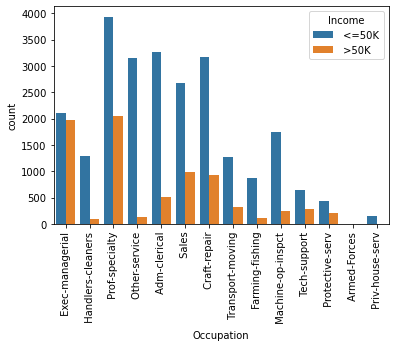

In [19]:
#Occupation Vs Income
sns.countplot(x='Occupation',data=censunp,hue='Income')
plt.xticks(rotation=90)

In [20]:
#Relationship
censunp['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

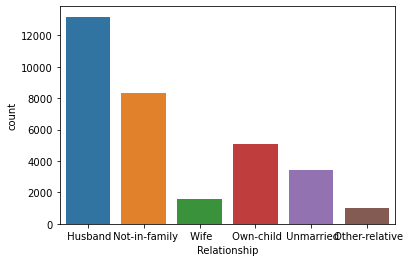

In [21]:
#visualizing Relationship
sns.countplot(x='Relationship',data=censunp)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

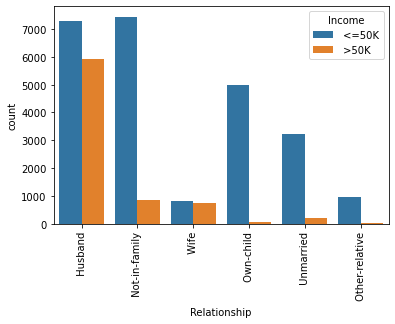

In [22]:
#Income Vs Relationship
sns.countplot(x='Relationship',hue='Income',data=censunp)
plt.xticks(rotation=90)

In [23]:
#Race
censunp['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

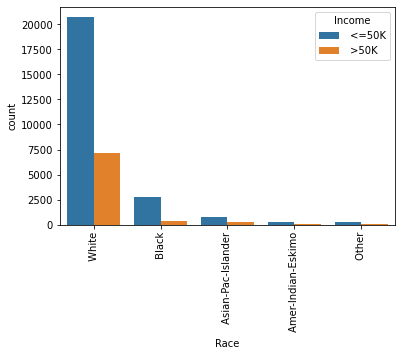

In [24]:
sns.countplot(x='Race',hue='Income',data=censunp)
plt.xticks(rotation=90)

In [25]:
#Sex
censunp['Sex'].unique()

array([' Male', ' Female'], dtype=object)

<AxesSubplot:xlabel='Sex', ylabel='count'>

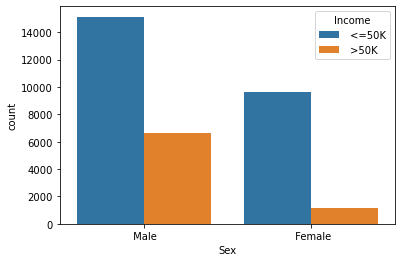

In [26]:
#visualizing the Sex data
sns.countplot(x='Sex',hue='Income',data=censunp)

In [27]:
#Native_country
censunp['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' Mexico'),
  Text(5, 0, ' South'),
  Text(6, 0, ' Puerto-Rico'),
  Text(7, 0, ' Honduras'),
  Text(8, 0, ' England'),
  Text(9, 0, ' Canada'),
  Text(10, 0, ' Germany'),
  Text(11, 0, ' Iran'),
  Text(12, 0, ' Philippines'),
  Text(13, 0, ' Italy'),
  Text(14, 0, ' Poland'),
  Text(15, 0, ' Columbia'),
  Text(16, 0, ' Cambodia'),
  Text(17, 0, ' Thailand'),
  Text(18, 0, ' Ecuador'),
  Text(19, 0, ' Laos'),
  Text(20, 0, ' Taiwan'),
  Text(21, 0, ' Haiti'),
  Text(22, 0, ' Portugal'),
  Text(23, 0, ' Dominican-Republic'),
  Text(24, 0, ' El-Salvador'),
  Text(25, 0, ' France'),
  Text(26, 0, ' Guatemala'),
  Text(27, 0, ' China'),
  Text(28, 0, ' Japan'),
  Text(29, 0, ' Yugoslavia'

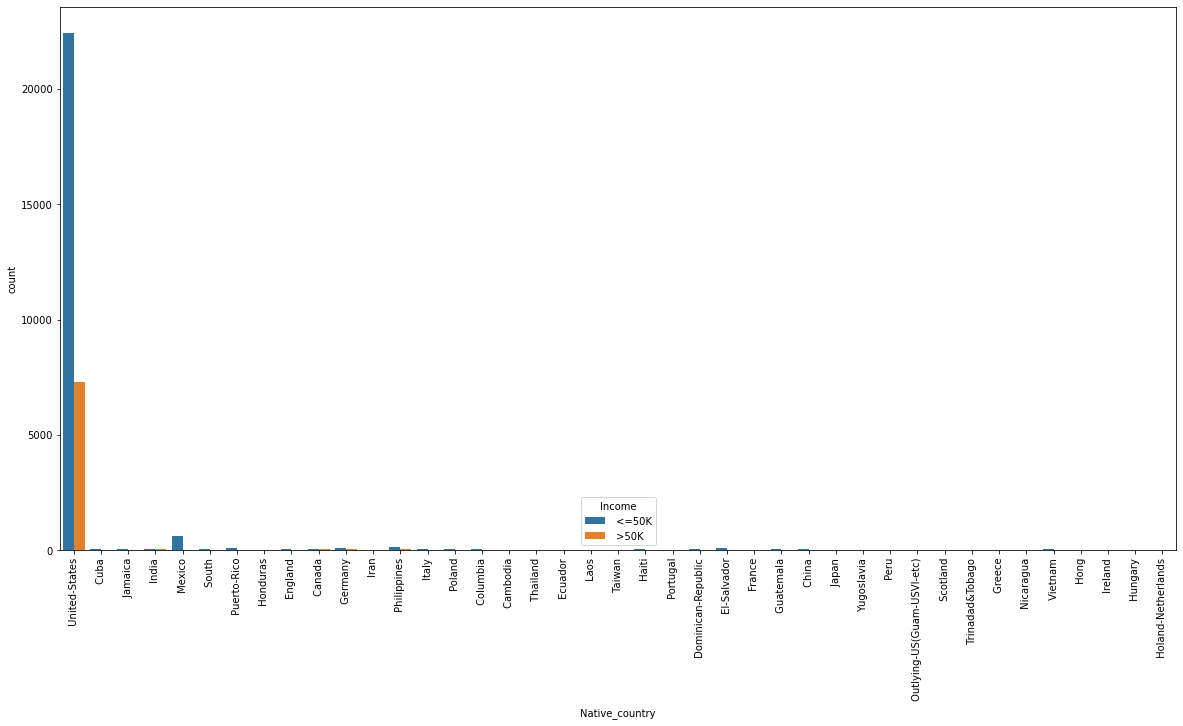

In [28]:
#Income Vs NAtive_country
plt.figure(figsize=(20,10))
sns.countplot(x='Native_country',hue='Income',data=censunp)
plt.xticks(rotation=90)

In [29]:
#Marital_status
censunp['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [30]:
censunp.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [31]:
#from data if we observe the education and education num is mapped to each other
censunp.loc[:,['Education','Education_num']]

,Education,Education_num
0,Bachelors,13
1,HS-grad,9
2,11th,7
3,Bachelors,13
4,Masters,14
...,...,...
32555,Assoc-acdm,12
32556,HS-grad,9
32557,HS-grad,9
32558,HS-grad,9


In [32]:
#so,we can delete Education column
censunp.drop(columns=['Education'],axis=1,inplace=True)

In [33]:
censunp.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [34]:
binary = ['Sex']
nominal = ['Workclass','Marital_status','Occupation','Relationship', 'Race','Native_country']

In [35]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()

def binary_encoder(df,columns):
    for i in columns:
        df[i] = le.fit_transform(df[i])
    return df
def onehot_encoder(df,columns):
    for i in columns:
        dummies = pd.get_dummies(df[i])
        df = pd.concat([df,dummies],axis=1)
        df.drop(i,axis=1,inplace=True)
    return df

In [36]:
censunp = binary_encoder(censunp,binary)
censunp = onehot_encoder(censunp,nominal)

In [37]:
censunp

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Federal-gov,Local-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,50,83311,13,1,0,0,13,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,1,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,1,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,40,154374,9,1,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,58,151910,9,0,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,22,201490,9,1,0,0,20,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
#dividing the target and feature variables
x =censunp.drop('Income',axis=1)
y =censunp['Income']

In [39]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Income, Length: 32560, dtype: object

In [40]:
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 1])

In [41]:
#Scaling the data using minmax scaler
from sklearn.preprocessing import MinMaxScaler

mms =MinMaxScaler()
x_scaled = mms.fit_transform(x)


In [42]:
#traing the model
from sklearn.model_selection import train_test_split,GridSearchCV

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

maxAccu =0
maxRs =0
for i in range(1,100):
    x_train,x_test,y_train,y_test =train_test_split(x_scaled,y,test_size =.20,random_state=i)
    lr = LogisticRegression()  
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc = accuracy_score(y_test,predlr)
    if acc>maxAccu :
        maxAccu =acc
        maxRs =i
print("Best accuracy is:",maxAccu,"On Random state:",maxRs)

pred_lr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_lr)*100)
print('\n',confusion_matrix(y_test,pred_lr))
print("Classification Report:\n",classification_report(y_test,pred_lr))
print("")


Best accuracy is: 0.8587223587223587 On Random state: 11
Accuracy 84.56695331695332

 [[4558  368]
 [ 637  949]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4926
           1       0.72      0.60      0.65      1586

    accuracy                           0.85      6512
   macro avg       0.80      0.76      0.78      6512
weighted avg       0.84      0.85      0.84      6512




In [44]:
#cross_validation for LogisticRegression
from sklearn.model_selection import cross_val_score

crv = cross_val_score(lr,x,y,cv=10)
print("Cross validation score of LogisticRegression Model",crv.mean())

Cross validation score of LogisticRegression Model 0.7970823095823095


In [45]:
#Tunning the parameter using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.25,random_state=11)

clf = RandomForestClassifier()

params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}
grd = GridSearchCV(clf,param_grid=params)
grd.fit(x_train,y_train)

print('best_params= >',grd.best_params_)

#RandomForest Classifier

clf = grd.best_estimator_

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test,y_pred)

print("\n Accuracy RandomForest Normal===>",accuracy_score(y_test,y_pred))
print("\n Confusion_mat:",'\n',rf_conf_mat)
print('\n')
report =classification_report(y_test,y_pred)
print(report)

best_params= > {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}

 Accuracy RandomForest Normal===> 0.8556920556920556

 Confusion_mat: 
 [[17706   815]
 [ 2709  3190]]


              precision    recall  f1-score   support

           0       0.87      0.96      0.91     18521
           1       0.80      0.54      0.64      5899

    accuracy                           0.86     24420
   macro avg       0.83      0.75      0.78     24420
weighted avg       0.85      0.86      0.85     24420



In [46]:
#cross_validation for RandomForest
from sklearn.model_selection import cross_val_score

crv = cross_val_score(clf,x,y,cv=10)
print("Cross validation score of LogisticRegression Model",crv.mean())

Cross validation score of LogisticRegression Model 0.8593058968058969


In [47]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

pred_dt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_dt)*100)
print('\n',confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy 80.55282555282555

 [[16120  2401]
 [ 2348  3551]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     18521
           1       0.60      0.60      0.60      5899

    accuracy                           0.81     24420
   macro avg       0.73      0.74      0.74     24420
weighted avg       0.81      0.81      0.81     24420



In [48]:
#cross_validation for DecisionTree

crv = cross_val_score(dt,x,y,cv=10)
print("Cross validation score of DecisionTree Model",crv.mean())

Cross validation score of DecisionTree Model 0.8163390663390663


In [49]:
#SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_svc)*100)
print("\n",confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))


Accuracy 77.83374283374283

 [[18513     8]
 [ 5405   494]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     18521
           1       0.98      0.08      0.15      5899

    accuracy                           0.78     24420
   macro avg       0.88      0.54      0.51     24420
weighted avg       0.82      0.78      0.70     24420



# From the model building i observed one thing that Accuracy score and CV score are
#### For LogisticRegression Accuracyscore is : 84% and CV Score:79%
#### for RandomForest Accuracyscore is : 88% and CV Score:88%
#### For Decision Tree Accuracyscore is : 80% and CV Score:81%
#### For SVC Accuracyscore is : 77% 
#### So,from the result im considering the RandomForestClassifier is best for my model

In [52]:
#AUC_ROC_CURve
pred_prob_lr = lr.predict_proba(x_test)
pred_prob_dt = dt.predict_proba(x_test)
pred_prob_clf= clf.predict_proba(x_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, pred_prob_lr[:,1], pos_label=1)
fpr_dt, tpr_dt, thresh_dt = roc_curve(y_test, pred_prob_dt[:,1], pos_label=1)
fpr_clf, tpr_clf, thresh_clf = roc_curve(y_test, pred_prob_clf[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score_lr = roc_auc_score(y_test, pred_prob_lr[:,1])
auc_score_dt = roc_auc_score(y_test, pred_prob_dt[:,1])
auc_score_clf = roc_auc_score(y_test, pred_prob_clf[:,1])

print("AUC_score for linearRegression :",auc_score_lr, "\n AUC_score for DecisionTree Classifier:",auc_score_dt,
      "\n AUC_score for RandomForestClassifier:",auc_score_clf)

AUC_score for linearRegression : 0.5 
 AUC_score for DecisionTree Classifier: 0.7361649031486129 
 AUC_score for RandomForestClassifier: 0.9097844006380684


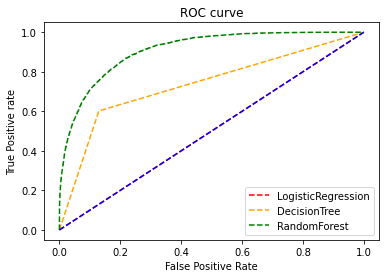

In [54]:
# plot roc curves
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='red', label='LogisticRegression')
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='orange', label='DecisionTree')
plt.plot(fpr_clf, tpr_clf, linestyle='--',color='green', label='RandomForest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [55]:
#saving the model
import joblib
joblib.dump(clf,"censunp.pkl")

['censunp.pkl']